# Generate plots and tables with SampCompDB

Whether ran from the CLI or API `SampComp` creates a python object database (shelve DBM) containing the statistical analysis results.

The API directly returns a `SampCompDB` object wrapping the shelve. It is also possible to reload the `SampCompDB` latter using the db file path prefix. `SampCompDB` also need a FASTA file to get the corresponding reference id sequence and accept an optional BED file containing genomic annotations. SampCompDB provide a large selection of simple high level function to plot and export the results.

At the moment `SampCompDB` is only accessible through the python API.

## Import the package

In [9]:
from nanocompore.SampCompDB import SampCompDB, jhelp

## Load the database with SampCompDB

In [10]:
jhelp (SampCompDB)

---

**nanocompore.SampCompDB.__init__**

Import a shelve db and a fasta reference file. Automatically returned by SampComp Can also be manually created from an existing shelve db output

---

* **db_prefix** *: file_prefix_path (required)*

Prefix of the database. For example if the path to the db file is "/outpath/out.db" the db_prefix is "/outpath/out"

* **fasta_fn** *: file_path (required)*

Path to a fasta file corresponding to the reference used for read alignemnt

* **bed_fn** *: file_path (default = None)*

Path to a BED file containing the annotation of the transcriptome used as reference when mapping

* **run_type** *: str {RNA,DNA} (default = RNA)*

Define the run type model to import (RNA or DNA)

* **log_level** *: str {warning,info,debug} (default = info)*

Set the log level.



### Basic initialisation

In [11]:
# Load database
db = SampCompDB (
    db_prefix = "results/simulated_",
    fasta_fn = "references/simulated/ref.fa")

# Print general metadata information
print (db)

# Prit list of references containing valid data
print (db.ref_id_list)

Loading SampCompDB
Calculate results


[SampCompDB]
	package_name: nanocompore
	package_version: 1.0.0b7
	timestamp: 2019-04-04 11:05:23.270305
	comparison_methods: ['GMM', 'KS']
	pvalue_tests: ['GMM_anova_pvalue', 'KS_dwell_pvalue', 'KS_intensity_pvalue']
	sequence_context: 0
	min_coverage: 30
	n_samples: 4
	Number of references: 5

['ref_0000', 'ref_0002', 'ref_0001', 'ref_0003', 'ref_0004']


## Generate text reports

`SampCompDB` can generate 3 types of text reports:
* Tabulated statistics => **`save_report`**
* Tabulated intensity and dwell values per conditions => **`save_shift_stats`**
* BED significant genomic positions =>  **`save_to_bed`**

In addition, we also conveniently wrapped all 3 methods in **`save_all`**.

### save_report

In [11]:
jhelp(SampCompDB.save_report)

---

**nanocompore.SampCompDB.save_report**

Saves a tabulated text dump of the database containing all the statistical results for all the positions

---

* **output_fn** *: str (default = None)*

Path to file where to write the data. If None, data is returned to the standard output.



In [10]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_", fasta_fn = "references/simulated/ref.fa", log_level="warning")

# Save report
db.save_report (output_fn="./results/simulated_report.tsv")

# Visualise first lines
!head "./results/simulated_report.tsv"

pos	chr	genomicPos	ref_id	strand	ref_kmer	GMM_anova_pvalue	KS_dwell_pvalue	KS_intensity_pvalue	GMM_cov_type	GMM_n_clust	cluster_counts	Anova_delta_logit
0	NA	NA	ref_0000	NA	AATGG	0.005245519399155092	1.6993740039732178e-11	1.4627259309612494e-17	full	2	Modified_rep1:6/49__Modified_rep2:4/41__Unmodified_rep1:41/14__Unmodified_rep2:32/13	-2.9907071055
1	NA	NA	ref_0000	NA	ATGGG	nan	8.820572851659097e-06	0.00013789333950857486	full	1	NC	nan
2	NA	NA	ref_0000	NA	TGGGC	nan	0.014838000312885985	7.275766237834673e-05	full	1	NC	nan
3	NA	NA	ref_0000	NA	GGGCT	nan	0.7170686058500053	0.9283139049939192	full	1	NC	nan
4	NA	NA	ref_0000	NA	GGCTT	nan	0.8151939481590966	0.9695221198459655	full	1	NC	nan
5	NA	NA	ref_0000	NA	GCTTA	nan	0.9988610897488148	0.6475435384552904	full	1	NC	nan
6	NA	NA	ref_0000	NA	CTTAA	nan	0.9861884723418123	0.9968163382856648	full	1	NC	nan
7	NA	NA	ref_0000	NA	TTAAA	nan	0.9611279889382083	0.7193199986470227	full	1	NC	nan
8	NA	NA	ref_0000	NA	TAAAC	nan	0.8151939481590966	0.71931999864

### save_shift_stats

In [12]:
jhelp(SampCompDB.save_shift_stats)

---

**nanocompore.SampCompDB.save_shift_stats**

Save the mean, median and sd intensity and dwell time for each condition and for each position. This can be used to evaluate the intensity of the shift for significant positions.

---

* **output_fn** *(default = None)*

Path to file where to write the data. If None, data is returned to the standard output.



In [12]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_", fasta_fn = "references/simulated/ref.fa", log_level="warning")

# Save report
db.save_shift_stats (output_fn="./results/simulated_shift.tsv")

# Visualise first lines
!head "./results/simulated_shift.tsv"

red_if	pos	c1_mean_intensity	c2_mean_intensity	c1_median_intensity	c2_median_intensity	c1_sd_intensity	c2_sd_intensity	c1_mean_dwell	c2_mean_dwell	c1_median_dwell	c2_median_dwell	c1_sd_dwell	c2_sd_dwell
ref_0001	0	99.86521522816629	95.52846468110967	100.16702432141244	95.13036610945501	3.7516782494836702	3.1739776537905118	0.017977369379788073	0.014142268215356003	0.014592671365001404	0.009938811132441343	0.011880802887400801	0.01184474740385291
ref_0001	1	95.51936094713678	87.27615952874599	95.9945031188992	86.41810985869571	4.439033457155757	4.104499368547678	0.022549460598306155	0.013115311034969667	0.01937803071046053	0.009880540414948643	0.014722117319511605	0.00973550865537285
ref_0001	2	95.52315169782791	92.34964506890061	95.26854917868084	92.33788488943738	5.950261769233862	5.868269402327571	0.015595689944837725	0.013457094587408206	0.012115546273371455	0.008773347718738837	0.00933692542234524	0.01274618467516576
ref_0001	3	122.29563233691074	120.31834278328982	122.335361725246

### save_to_bed

In [13]:
jhelp(SampCompDB.save_to_bed)

---

**nanocompore.SampCompDB.save_to_bed**

Save the position of significant positions in the genome space in BED6 or BEDGRAPH format. The resulting file can be used in a genome browser to visualise significant genomic locations. The option is only available if `SampCompDB` if initialised with a BED file containing genome annotations.

---

* **output_fn** *(default = None)*

Path to file where to write the data

* **bedgraph** *(default = False)*

save file in bedgraph format instead of bed

* **pvalue_field** *(default = None)*

specifies what column to use as BED score (field 5, as -log10)

* **pvalue_thr** *(default = 0.01)*

only report positions with pvalue<=thr

* **span** *(default = 5)*

The size of each BED feature. If size=5 (default) features correspond to kmers. If size=1 features correspond to the first base of each kmer.

* **convert** *(default = None)*

one of 'ensembl_to_ucsc' or 'ucsc_to_ensembl". Convert chromosome named between Ensembl and Ucsc conventions

* **assembly** *(default = None)*

required if convert is used. One of "hg38" or "mm10"



In [ ]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_", fasta_fn = "references/simulated/ref.fa", bed_fn="references/simulated/annot.bed", log_level="warning")

# Save report
db.save_to_bed (output_fn="./results/simulated_sig_positions.bed")

# Visualise first lines
!head "./results/simulated_sig_positions.bed"

## Generate plots

`SampCompDB` comes with a range of methods to visualise the data and explore candidate.

* **`plot_pvalue`**: Plot the `-log(10)` of the pvalues obtained for all the statistical methods at reference level
* **`plot_signal`**: Generate comparative plots of both median intensity and dwell time for each condition at read level 
* **`plot_coverage`**: Plot the read coverage over a reference for all samples analysed 
* **`plot_kmers_stats`**: Fancy version of `plot_coverage` that also report missing, mismatching and undefined kmers status from Nanopolish 
* **`plot_position`**: Allow to visualise the distribution of intensity and dwell time in 2D for a single position


### Extra import for the plotting library

Matplotlib is required to use the ploting methods in Jupyter 

In [14]:
import matplotlib.pyplot as pl
%matplotlib inline

### plot_pvalue

In [15]:
jhelp(SampCompDB.plot_pvalue)

---

**nanocompore.SampCompDB.plot_pvalue**

Plot pvalues per position (by default plot all fields starting by "pvalue")

---

* **ref_id** *: str (required)*

Valid reference id name in the database

* **start** *: int (default = None)*

Start coordinate

* **end** *: int (default = None)*

End coordinate (included)

* **kind** *: {lineplot,barplot} (default = lineplot)*

kind of plot to represent the data

* **figsize** *: tuple of 2 int (default = (30, 10))*

length and heigh of the output plot

* **palette** *: str (default = Set2)*

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** *: str (default = ggplot)*

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

* **tests** *: str, list or None (default = None)*

Limit the pvalue methods shown in the plot. Either a list of methods or a string coresponding to a part of the name



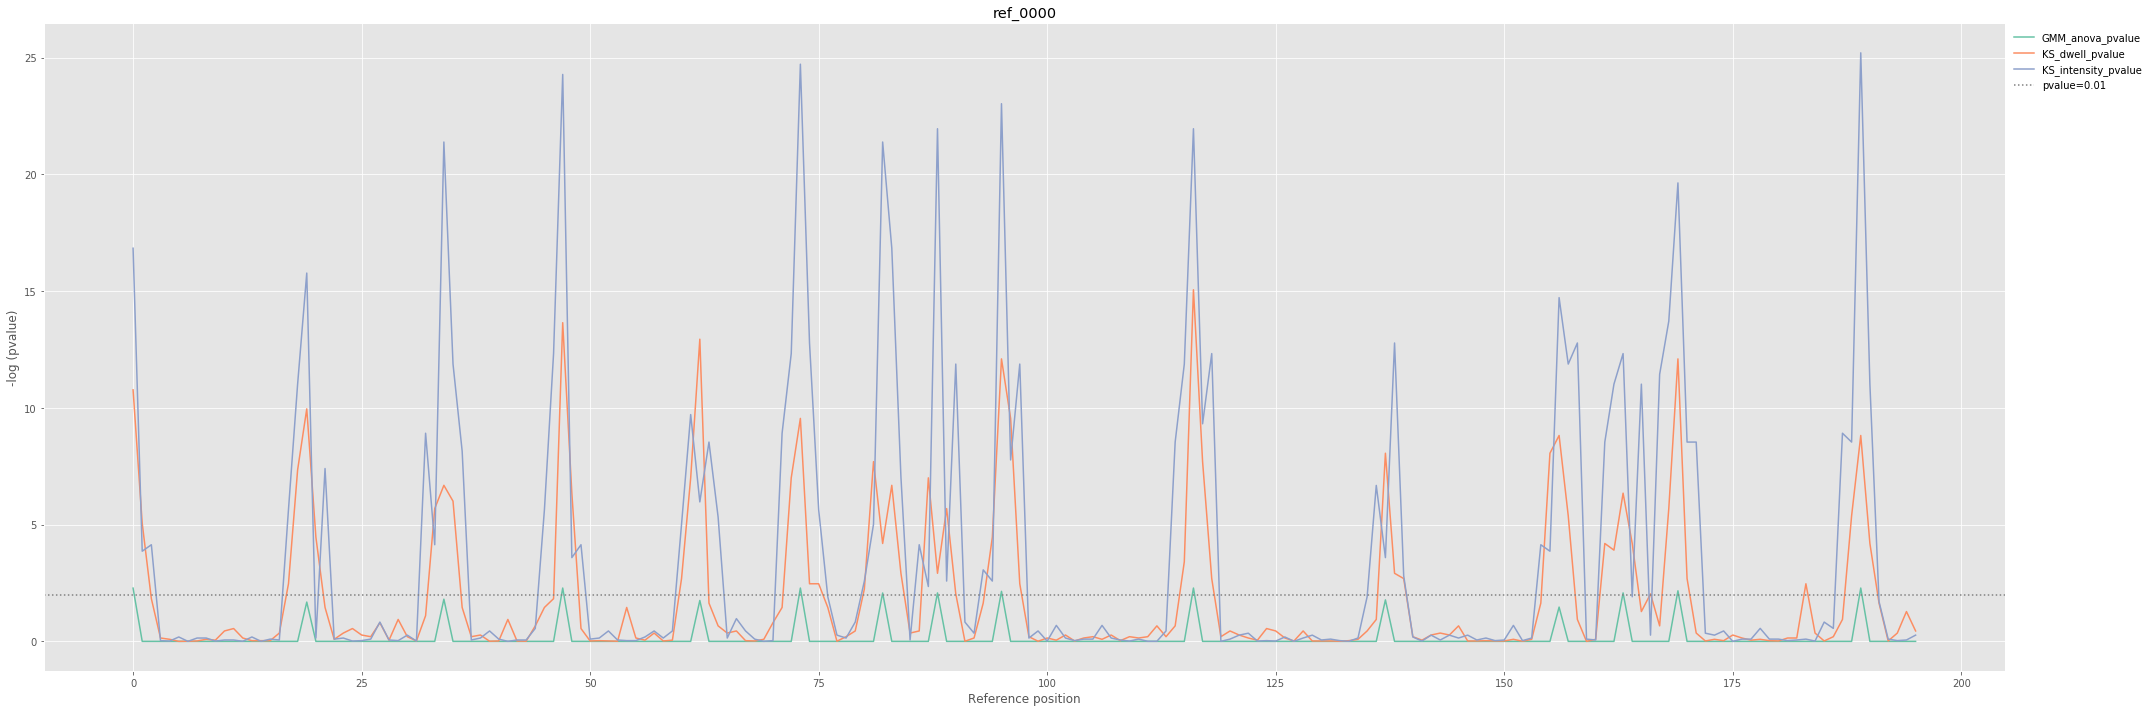

In [25]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_pvalue ("ref_0000")

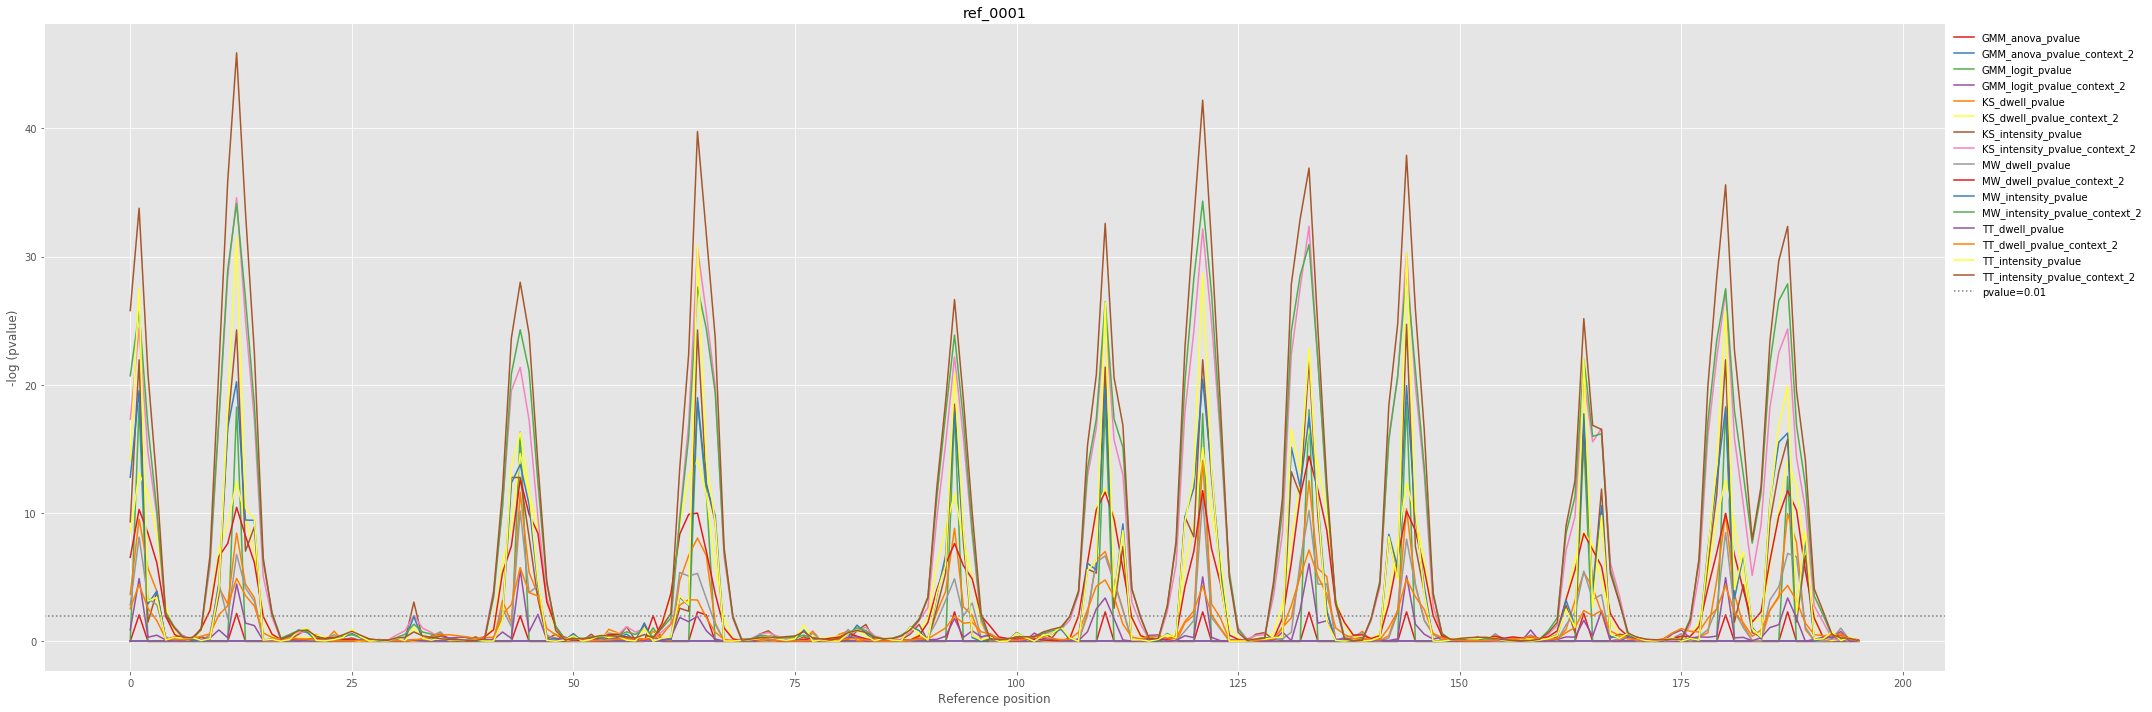

In [26]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_stats_", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_pvalue ("ref_0001", palette="Set1")

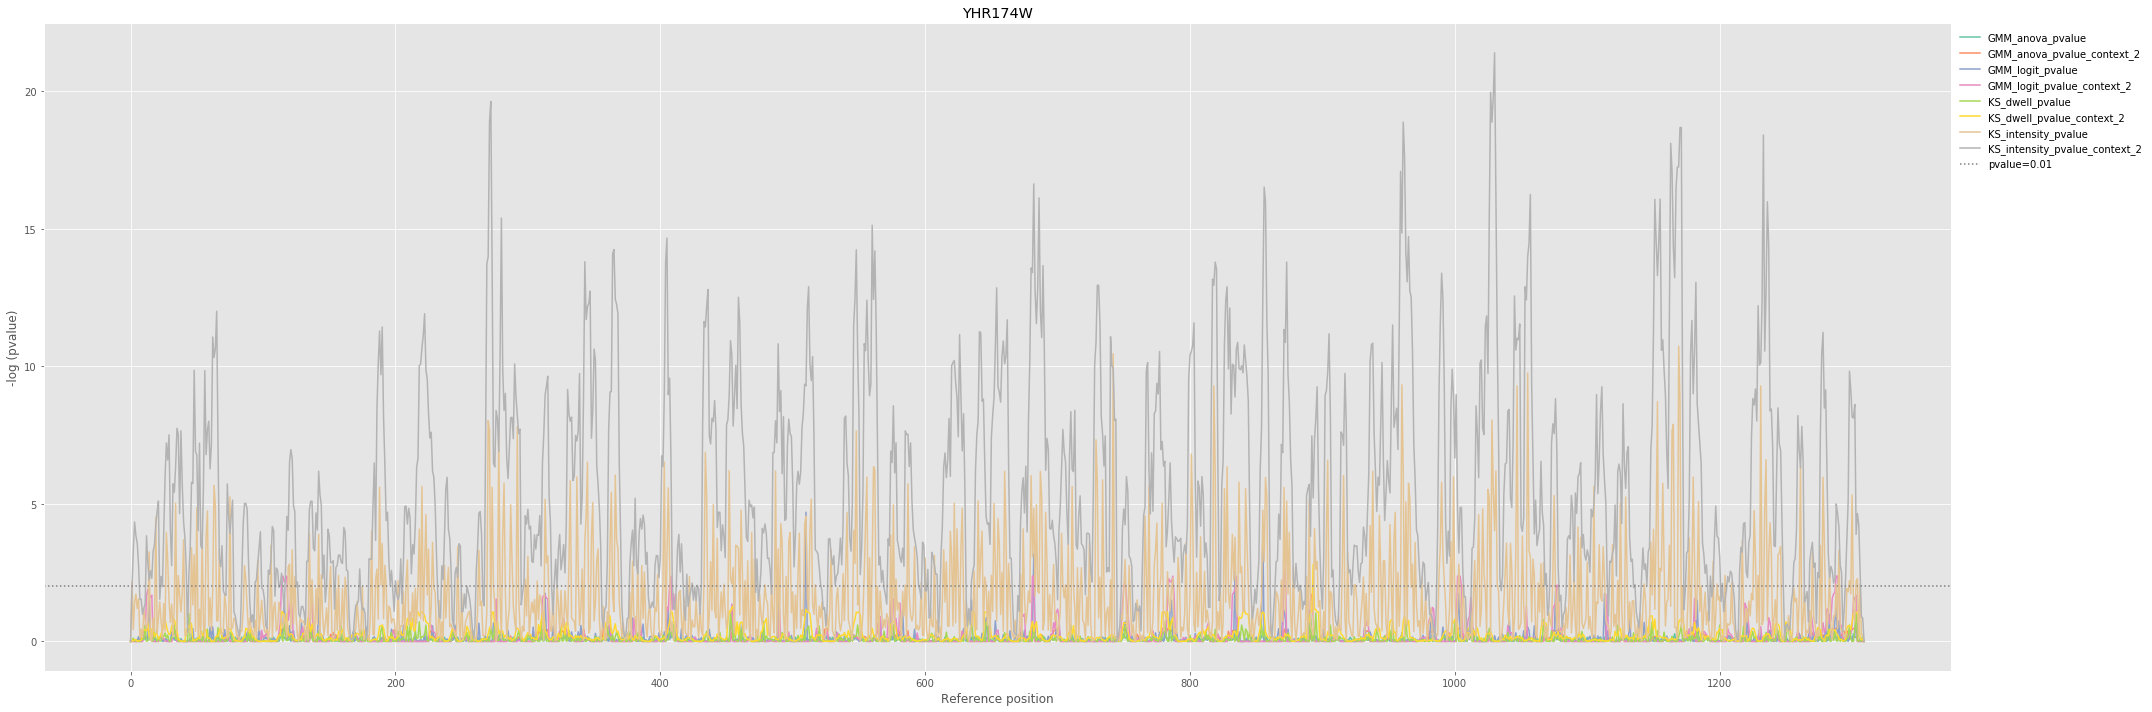

In [35]:
# Reload DB
db = SampCompDB (db_prefix = "results/yeast_", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_pvalue ("YHR174W")

### plot_signal

In [16]:
jhelp(SampCompDB.plot_signal)

---

**nanocompore.SampCompDB.plot_signal**

Plot the dwell time and median intensity distribution position per position Pointless for more than 50 positions at once as it becomes hard to distinguish

---

* **ref_id** *: str (required)*

Valid reference id name in the database

* **start** *: int (default = None)*

Start coordinate

* **end** *: int (default = None)*

End coordinate (included)

* **kind** *: {violinplot, boxenplot, swarmplot} (default = violinplot)*

Kind of plot

* **split_samples** *: bool (default = False)*

If samples for a same condition are represented separatly. If false they are merged per condition

* **figsize** *: tuple of 2 int (default = (30, 10))*

length and heigh of the output plot

* **palette** *: str (default = Set2)*

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** *: str (default = ggplot)*

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html



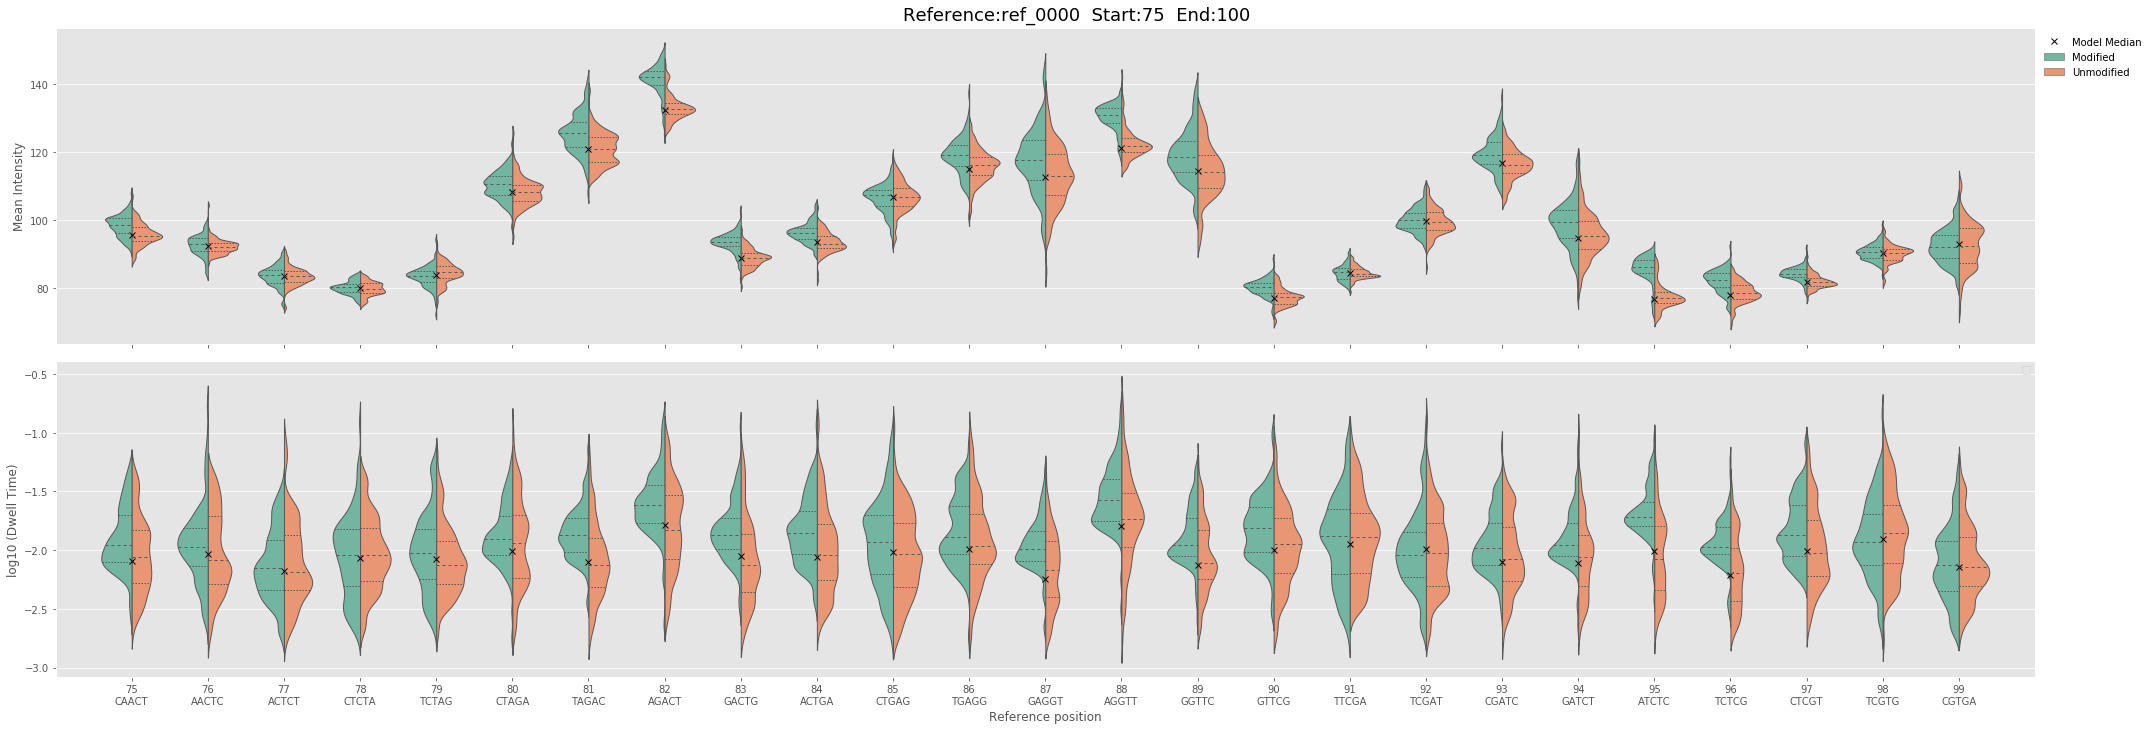

In [28]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_signal ("ref_0000", start=75, end=100)

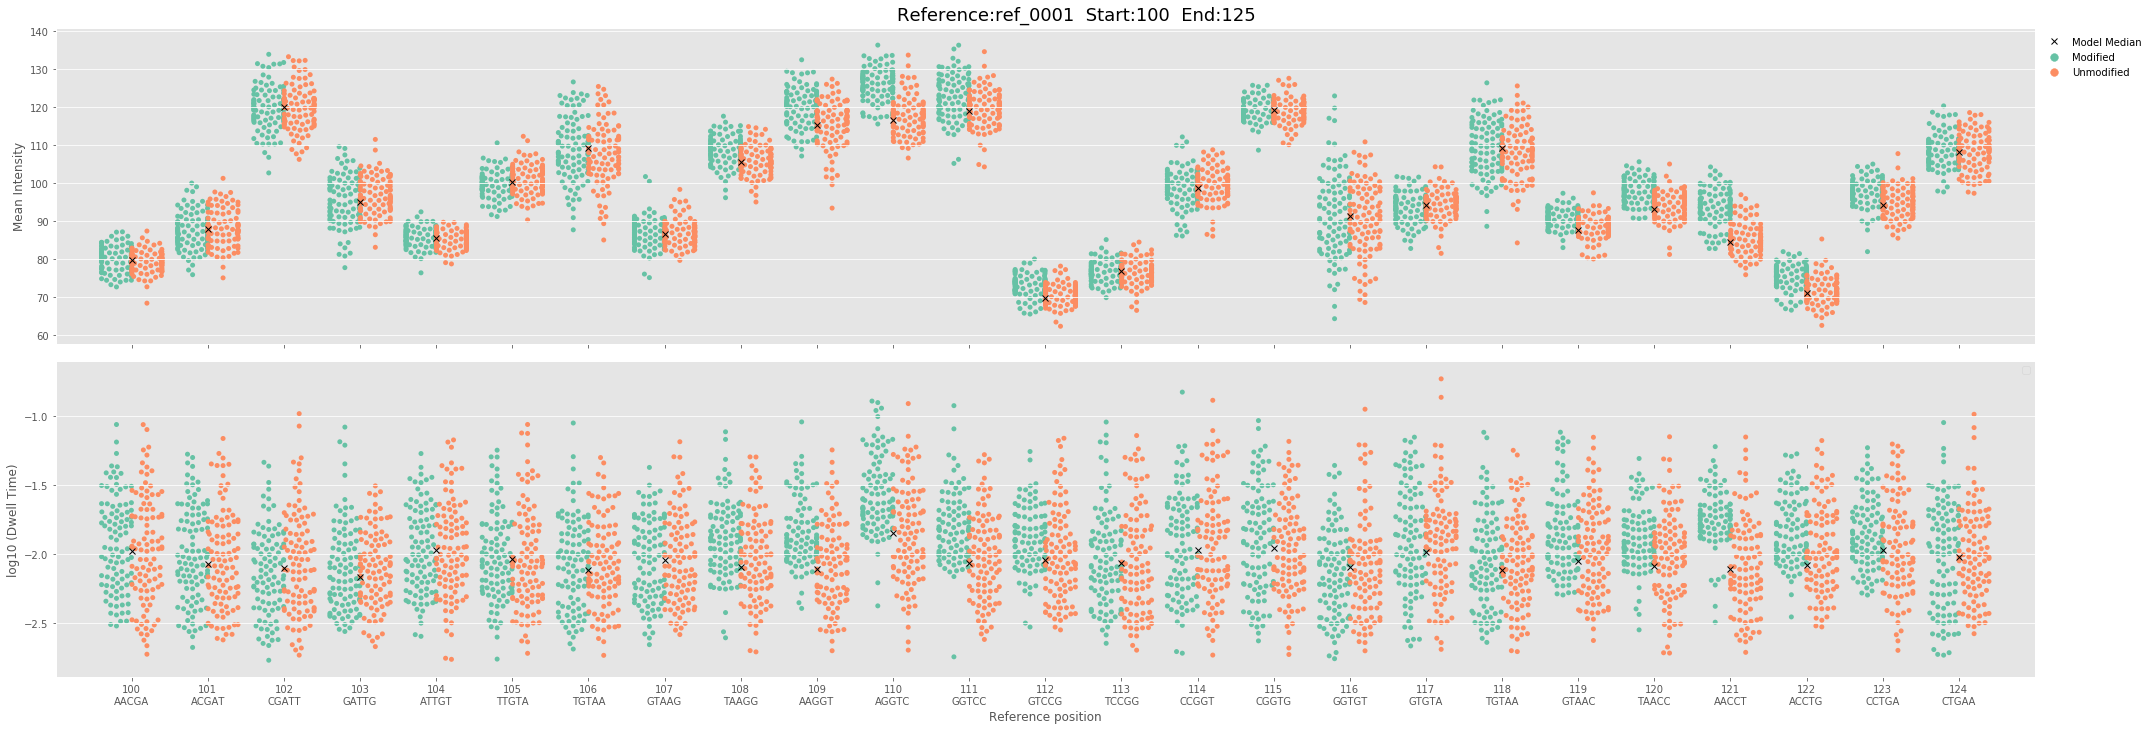

In [29]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_signal ("ref_0001", start=100, end=125, kind="swarmplot")

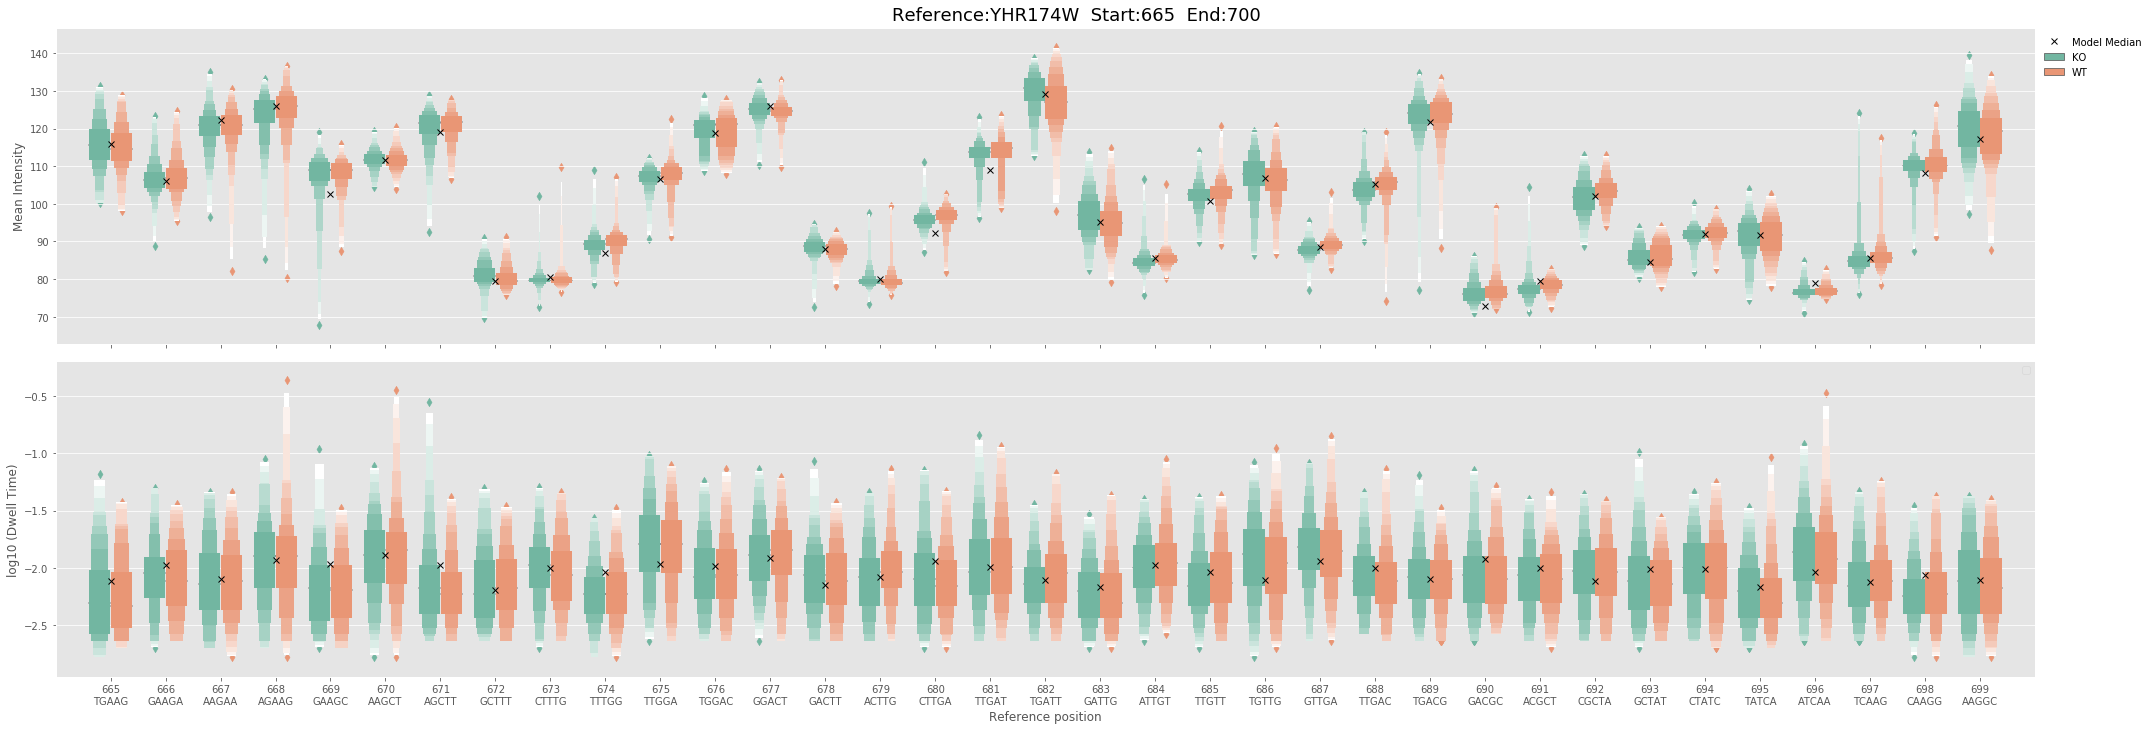

In [36]:
# Reload DB
db = SampCompDB (db_prefix = "results/yeast_", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_signal ("YHR174W", start=665, end=700, kind="boxenplot")

### plot_coverage

In [16]:
jhelp(SampCompDB.plot_coverage)

---

**nanocompore.SampCompDB.plot_coverage**

Plot the read coverage over a reference for all samples analysed

---

* **ref_id** *: str (required)*

Valid reference id name in the database

* **start** *: int (default = None)*

Start coordinate

* **end** *: int (default = None)*

End coordinate (included)

* **figsize** *: tuple of 2 int (default = (30, 5))*

length and heigh of the output plot

* **palette** *: str (default = Set2)*

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** *: str (default = ggplot)*

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html



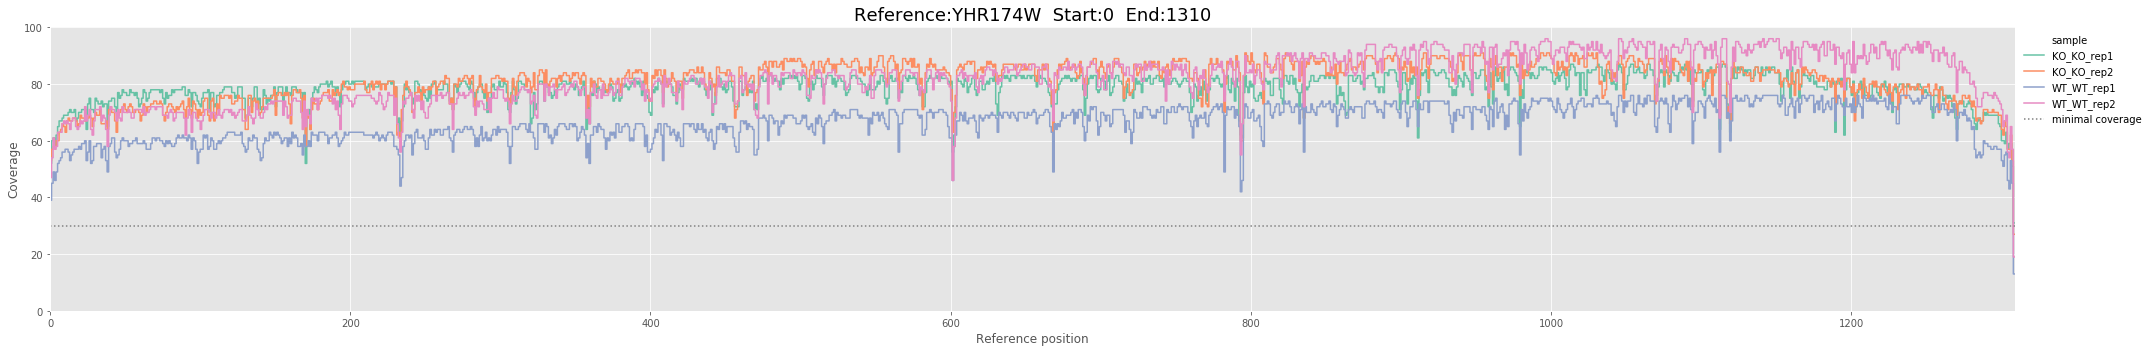

In [39]:
# Reload DB
db = SampCompDB (db_prefix = "results/yeast_", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_coverage ("YHR174W")

### plot_kmers_stats

In [17]:
jhelp(SampCompDB.plot_kmers_stats)

---

**nanocompore.SampCompDB.plot_kmers_stats**

Fancy version of `plot_coverage` that also report missing, mismatching and undefined kmers status from Nanopolish

---

* **ref_id** *: str (required)*

Valid reference id name in the database

* **start** *: int (default = None)*

Start coordinate

* **end** *: int (default = None)*

End coordinate (included)

* **figsize** *: tuple of 2 int (default = (30, 10))*

length and heigh of the output plot

* **palette** *: str (default = Accent)*

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** *: str (default = ggplot)*

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html



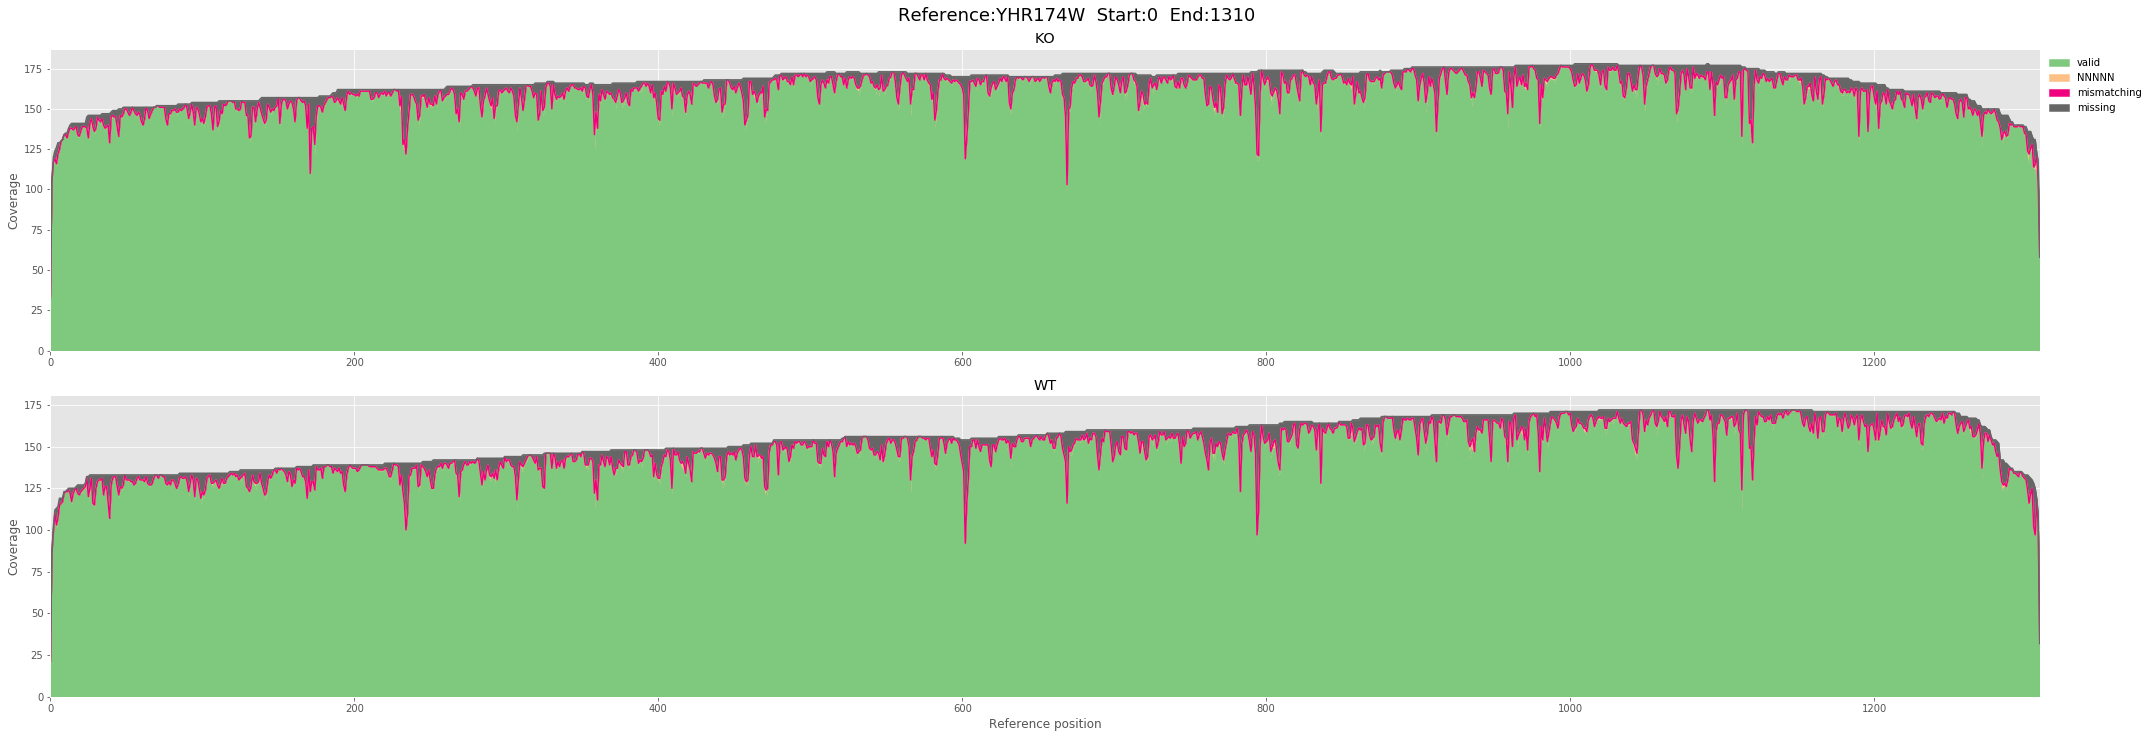

In [40]:
# Reload DB
db = SampCompDB (db_prefix = "results/yeast_", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_kmers_stats ("YHR174W")

### plot_position 

In [18]:
jhelp(SampCompDB.plot_position)

---

**nanocompore.SampCompDB.plot_position**

Plot the dwell time and median intensity at the given position as a scatter plot.

---

* **ref_id** *: str (required)*

Valid reference id name in the database

* **pos** *: int (default = None)*

Position of interest

* **split_samples** *(default = False)*

If True, samples for a same condition are represented separately. If False, they are merged per condition

* **figsize** *: tuple of 2 int (default = (30, 10))*

length and heigh of the output plot

* **palette** *: str (default = Set2)*

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** *: str (default = ggplot)*

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

* **xlim** *: tuple of 2 int (default = (None, None))*

A tuple of explicit limits for the x axis

* **ylim** *: tuple of 2 int (default = (None, None))*

A tuple of explicit limits for the y axis

* **kde** *: bool (default = True)*

plot the KDE of the intensity/dwell bivarariate distributions in the two samples

* **scatter** *: bool (default = True)*

if True, plot the individual data points

* **pointSize** *: int (default = 20)*

int specifying the point size for the scatter plot

* **model** *: bool (default = False)*

If true, plot the GMM density estimate

* **gmm_levels** *: int (default = 50)*

number of contour lines to use for the GMM countour plot



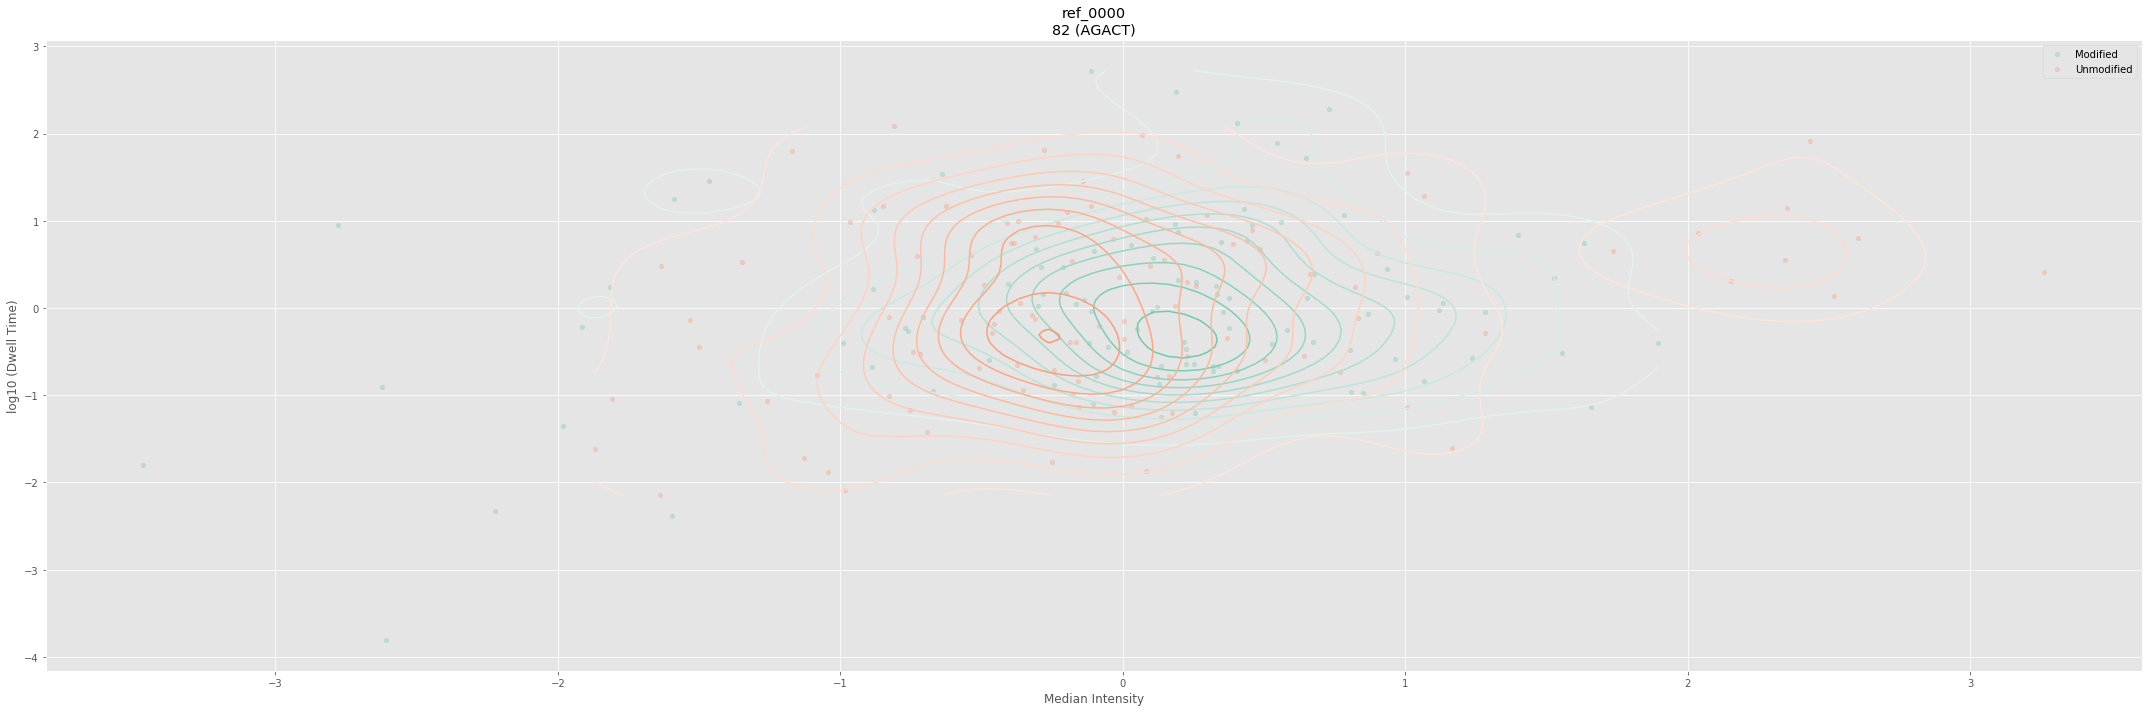

In [41]:
# Reload DB
db = SampCompDB (db_prefix = "results/simulated_", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_position ("ref_0000", pos=82)